## Hessian Schatten Norm Regularizers

* `reg_HS2` is the Hessian Schatten (2) Norm Regularizer
* `reg_HT` is the sum of the `abs2` entries of the Hessian matrix. It behaves very similar to `reg_HS2` but is roughly 3 times faster.

In [40]:
using Revise # for development useful
using DeconvOptim, TestImages, Colors, FFTW, Noise, ImageShow

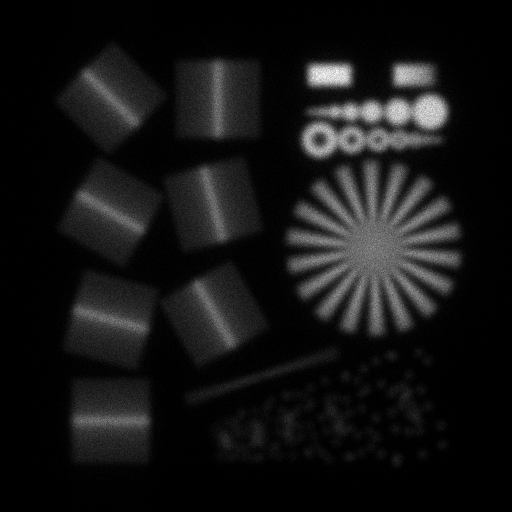

In [41]:
# load test image
img = Float32.(testimage("resolution_test_512"))

# generate simple Point Spread Function of aperture radius 30
psf = Float32.(generate_psf(size(img), 30))

# create a blurred, noisy version of that image
img_b = DeconvOptim.conv(img, psf)
img_n = poisson(img_b, 300);
Gray.(img_n)

In [42]:
reg_TV = TV()
reg_HS2 = HS(p=2)
reg_TH = TH()

#93 (generic function with 1 method)

In [44]:
@time res_TH, o = deconvolution(img_n, psf, regularizer=reg_TH, λ=0.01, iterations=50)
@time res_HS2, o = deconvolution(img_n, psf, regularizer=reg_HS2, λ=0.01, iterations=50)
@time res_TV, o = deconvolution(img_n, psf, regularizer=reg_TV, λ=0.005, iterations=50)

  1.290069 seconds (97.47 k allocations: 2.726 GiB, 5.02% gc time)
  4.145748 seconds (216.47 k allocations: 9.826 GiB, 5.02% gc time)
  1.232222 seconds (92.22 k allocations: 2.813 GiB, 4.15% gc time)


(Float32[0.00011511241 7.837372f-5 … 0.00047285005 0.00023074496; 3.871948f-5 1.1677908f-5 … 0.0002966653 0.00015776898; … ; 2.0506612f-5 5.334853f-5 … 4.6581164f-5 1.8572735f-5; 8.227502f-5 0.00012208507 … 0.00025251703 0.00011893458],  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.390949e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 5.44e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.37e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.17e-02 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.17e-07 ≰ 0.0e+00
    |g(x)|                 = 4.57e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    50
    f(x) calls:    151
    ∇f(x) calls:   151
)

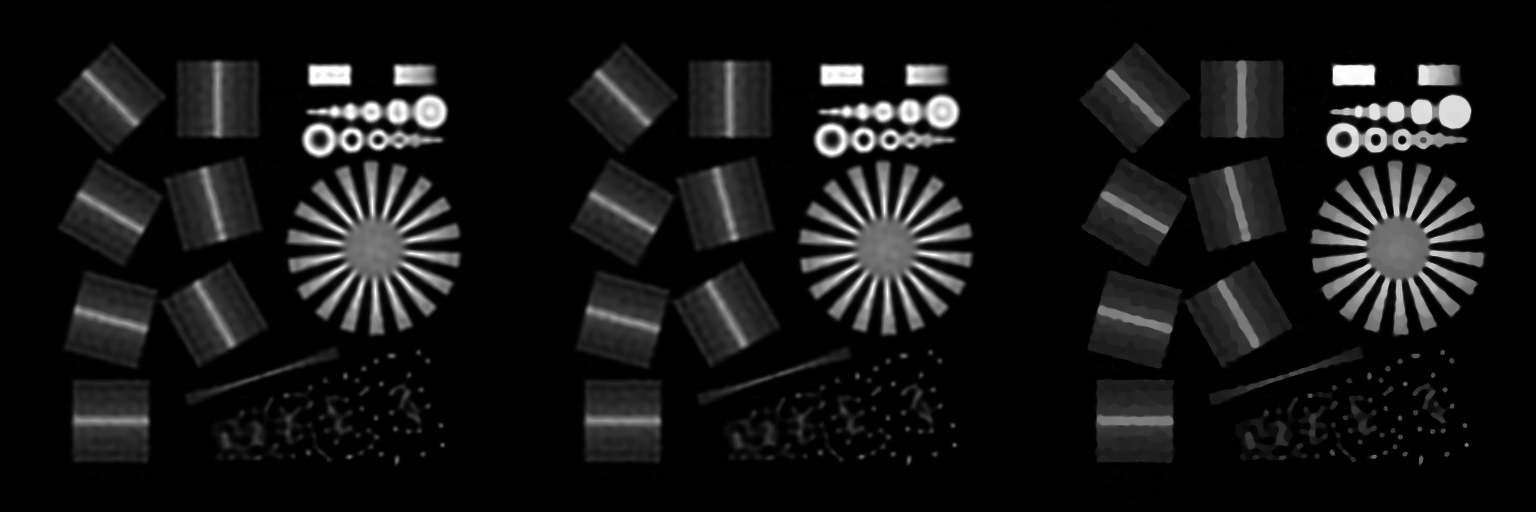

In [45]:
[Gray.(res_TH) Gray.(res_HS2) Gray.(res_TV)]